# Introduction

This is a tutorial sheet to load in some data from the Raspberry Pi (RPi) magnetometer, compare it to data from a recording sysatem at a BGS observatory and then apply a temperature correction to the RPi data.

The magnetic field measured by the RPi sensors is strongly affected by changes in temperature - about 2-4 nanoTesla per degree. If the RPi magnetometer is running in a room without temperature control (e.g. no air conditioning or heating), or sitting on a window ledge in the open sun, then the data recorded will contains information about changes of the Earth's magnetic field (good) but also the effect of the sensors themselves warming or cooling over the day (bad).

In this sheet, a set of Raspberry Pi data were recorded in Edinburgh on the 29-Aug-2015 in an open room, with sunlight shining on the sensor from around 13.00--19.00. This caused a rise in temperature of around 10 degrees C during the day. 

In Eskdalemuir Observatory in the Scottish Borders about 100 km south of the Raspberry Pi sensor in Edinburgh, data were recorded on the BGS GDAS data. The Eskdalemuir sensor sits in a temperature-controlled underground vault where the variation is less than 0.1 degrees over a day. 

As we compare the datasets we see there is a large difference in the middle of the afternoon. Note though that we do expect  small differences to arise between the two sensors because they are sited in different locations anyway. 

--------

Notebook Author: Ciaran Beggan [ciar@bgs.ac.uk]

Date created: 02-Sep-2015

Date last modified: 16-Sep-2015

v0: Initial tutorial

-------

## Initialise the Notebook - load useful modules

In [17]:
import sys
import pandas as pd
import os.path as pth
from datetime import datetime
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


## RPi: Load data and plot Horizontal component

The Raspberry Pi sensor does not record a magnetic field value every one second, rather it averages around five seconds worth of data samples and then timestamps the data as they are written to the output file. This means the data have an irregular timestamp.

Plot out the Horizontal variation of $H = \sqrt(X^2 + Y^2)$ of the Raspberry Pi data. The 29-Aug-2015 was a relatively active data geomagnetically speaking with a large slow change of around 80 nT between 09:00 and 20:00. 

There are also more rapid variations over several minutes to hours. These are typically caused by <i> magnetospheric pulsations </i> or <i>auroral electrojet activity</i> at higher latitudes.

In [18]:
DATA_DIR =r'.'
DATA_FILENAME = 'MagData_29_Aug_2015.dat'

''' The RPi data file contains 11 columns. The first six are the time units (year, month, day, hour, minute, second)
the next three (X,Y,Z) are the orthogonal components of the magnetic field in SI units of nanoTesla (nT).
The tenth column is the computed total field strength (F) in nanoTesla and the final column is the temperature in degrees Celsuis '''

DATA_COL_NAMES = ['year', 'month', 'day', 'hour', 'minute', 'second', 'x', 'y', 'z', 'f', 'temperature']
TIME_COLS = ['year', 'month', 'day', 'hour', 'minute', 'second']  
data_file = pth.join(DATA_DIR, DATA_FILENAME)

# Define a small function to turn the six time columns into the Python 'datetime' number
def minutely_date_parser(year, month, day, hour, minute, second):
    from datetime import datetime
    year, month, day, hour, minute, second = [int(x) 
                     for x in [year, month, day, hour, minute, second]]
    return (datetime(year, month, day, hour, minute, second))

# Read in the Rpi data using Comma Separated Value (CSV) in the Pandas module
Rpi_data = pd.read_csv(data_file,
                   delim_whitespace=True,
                   names = DATA_COL_NAMES,                       
                   parse_dates={'datetime':TIME_COLS},
                   date_parser = minutely_date_parser,
                   index_col='datetime')

# Display some values from the file
Rpi_data[1:10]

,x,y,z,f,temperature
datetime,,,,,
2015-08-29 00:00:08,0,16933.94,44433.83,47551.28,21.15
2015-08-29 00:00:16,0,16933.70,44434.31,47551.64,21.19
2015-08-29 00:00:24,0,16934.18,44433.59,47551.14,21.16
2015-08-29 00:00:32,0,16934.89,44434.07,47551.84,21.17
2015-08-29 00:00:40,0,16934.18,44434.31,47551.81,21.13
2015-08-29 00:00:48,0,16934.66,44434.79,47552.42,21.14
2015-08-29 00:00:55,0,16934.66,44435.51,47553.09,21.12
2015-08-29 00:01:03,0,16935.13,44434.79,47552.59,21.13
2015-08-29 00:01:11,0,16934.89,44435.03,47552.73,21.13


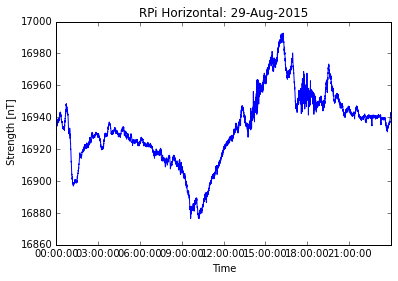

In [19]:
Rpi_H = np.sqrt(Rpi_data.x**2 + Rpi_data.y**2)    

fig = plt.figure()
plt.plot(Rpi_data.index, Rpi_H)
plt.ylabel(' Strength [nT]')
plt.xlabel('Time')
plt.title('RPi Horizontal: 29-Aug-2015')

## GDAS: Load data and plot Horizontal component

The GDAS (Geomagnetic Data Acquisition System) data comes from the BGS scientific observatory instruments at Eskdalemuir. These instruments operate in temperature controlled environments and record the data in picoTesla (pT), which are very small units of measurement: 1000 pT = 1 nT. The original file format has been converted to match that of the Rpi format above.

In [20]:
DATA_DIR =r'.'
DATA_FILENAME = 'Esk_29_Aug_2015.dat'

''' The GDAS data file contains 9 columns. The first six are the time units (year month day hour minute second)
the next three (H,E,Z) are the orthogonal components of the magnetic field in SI units of nanoTesla (nT).'''

DATA_COL_NAMES = ['year', 'month', 'day', 'hour', 'minute', 'second', 'h', 'e', 'z']
TIME_COLS = ['year', 'month', 'day', 'hour', 'minute', 'second']  
data_file = pth.join(DATA_DIR, DATA_FILENAME)

# Define a small function to turn the six time columns into the Python 'datetime' number
def minutely_date_parser(year, month, day, hour, minute, second):
    from datetime import datetime
    year, month, day, hour, minute, second = [int(x) 
                     for x in [year, month, day, hour, minute, second]]
    return (datetime(year, month, day, hour, minute, second))

# Read in the Rpi data using Comma Separated Value (CSV) in the Pandas module
GDAS_data = pd.read_csv(data_file,
                   delim_whitespace=True,
                   names = DATA_COL_NAMES,                       
                   parse_dates={'datetime':TIME_COLS},
                   date_parser = minutely_date_parser,
                   index_col='datetime')
# Display some values from the file
GDAS_data[1:10]

,h,e,z
datetime,,,
2015-08-29 00:00:01,38.805,162.142,108.965
2015-08-29 00:00:02,38.885,162.102,108.965
2015-08-29 00:00:03,38.805,162.023,108.965
2015-08-29 00:00:04,38.885,162.023,109.044
2015-08-29 00:00:05,38.885,162.023,108.965
2015-08-29 00:00:06,38.925,162.023,108.927
2015-08-29 00:00:07,39.004,161.983,108.927
2015-08-29 00:00:08,38.925,161.983,108.927
2015-08-29 00:00:09,39.004,161.983,108.965


Plot the Horizontal variation of the GDAS data. Note this is not the full Horizontal component (like that measured with the Rpi) - this is the variation of the horizontal field strength over the day about some arbitrary mean value.

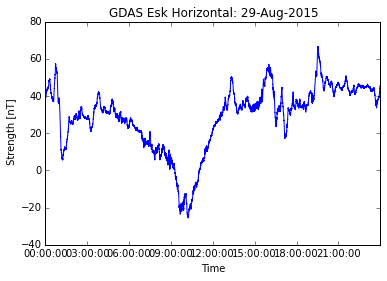

In [21]:
GDAS_H = (GDAS_data.h)    

fig = plt.figure()
plt.plot(GDAS_data.index, GDAS_H)
plt.ylabel(' Strength [nT]')
plt.xlabel('Time')
plt.title('GDAS Esk Horizontal: 29-Aug-2015')

Oh dear ... at first inspection these datasets are broadly similar but not exactly identical. Note the different size of the peaks for example. Why are they so different? Let's remove the mean value from each dataset and plot them alongside one another on the same graph to see where the discrepancies are.

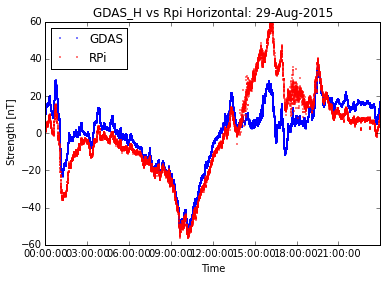

In [22]:
Rpi_H_zm = Rpi_H - np.mean(Rpi_H)
GDAS_H_zm = GDAS_H - np.mean(GDAS_H)
len(GDAS_H)

fig = plt.figure()
plt.hold(True)
plt.plot(GDAS_data.index, GDAS_H_zm, color='blue', linestyle='none', marker='.',markersize=2)
plt.plot(Rpi_data.index, Rpi_H_zm, color='red', linestyle='none', marker='.',markersize=2)
         
plt.ylabel(' Strength [nT]')
plt.xlabel('Time')
plt.title('GDAS_H vs Rpi Horizontal: 29-Aug-2015')
plt.legend(['GDAS', 'RPi'], loc=2)

The red line is clearly above the blue line during the afternoon period of the day. Now, let's plot out the temperature recorded by the sensor to see if there is any correlation with the <i> difference </i> between the Raspberry Pi data and the Eskdalemuir data.

To plot the difference between Eskdalemuir and the Raspberry Pi data, we wil have to interpolate the Eskdalemuir measurements to the same time points as the Raspberry Pi data. Use the numpy resample function to do this.

In [23]:
# Compute the Differences between Raspberry Pi and Eskdalemuir data by interpolation of the ESK data onto the RPi time points
Rpi_data_sec = Rpi_data.resample('S', fill_method='bfill', how='last')
Rpi_data_sec_H = np.sqrt(Rpi_data_sec.x**2 + Rpi_data_sec.y**2)    
#Take the GDAS data from the Rpi data - this will be negative mostly
Rpi_data_sec_H_zm =  Rpi_data_sec_H - np.mean(Rpi_data_sec_H)  
H_diff =  GDAS_H_zm -   Rpi_data_sec_H_zm


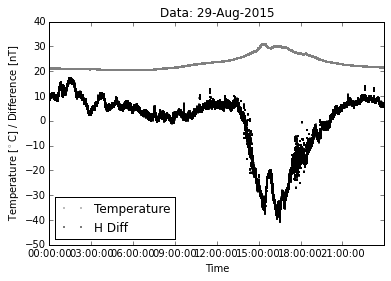

In [30]:
plt.plot(Rpi_data_sec.index, Rpi_data_sec.temperature, color='gray', linestyle='none', marker='.',markersize=2)
plt.hold(True)
plt.plot(Rpi_data_sec.index, H_diff[0:len(Rpi_data_sec.index)], color='black', linestyle='none', marker='.',markersize=2)
plt.ylabel(' Temperature [$^\circ$C] / Difference [nT]')
plt.xlabel('Time')
plt.title('Data: 29-Aug-2015')
plt.legend(['Temperature', 'H Diff'], loc=3)


There is clearly a correlation between the difference in the magnetic field measurements (black line) and the temperature (gray line). In the early part of the day (00:00 to 12:00) the temperature is fairly stable and the variation of the black line is small - a few nanoTesla. This is a real difference between the magnetic field at both locations. However as the temperature rises in the afternoon, the difference between the two sensors changes rapidly, as the Raspberry Pi sensor is heated by the sun shining on it. 

<i>We want to remove this effect! </i> To do this we can use regression analysis to work out the effect of the temperature change on the size of the magnetic field recorded. In essence we are looking to 'back out' the effect of the temperature variations.

## Temperature correction

In this part of the analysis we are going to figure out the scaling factors and offset that are required to remove the temperature effect in the magnetic data recorded by the Raspberry Pi. Rather than working with the values of the H component itself, we are going to use the difference between the Raspberry Pi and the GDAS system to figure out what the Raspberry Pi <i>should have recorded</i> compared to what it did record. We assume that the Raspberry Pi data should look quite similar to the GDAS sensor data and that the gross differences are due to the temperature. 

We will use the tried-and-tested method of linear algebra least square matrix inversion to do this. In effect we will be solving a large set of simultaneous equations relating thr temperature changes to the magnetic field changes. 

We need to make a few assumptions: (1) Let us assume that the temperature changes affect the system in a <i>non-linear</i> way, meaning that we should solve for an offset (in nanoTesla) between the RPi and the GDAS data, a linear scaling factor (i.e. change of the Rpi data in nanoTesla for every degree temperature rise) and a second-order scaling factor (i.e. the change in nanoTesla squared per degree squared). 

These three factors should give us a way to 'regress' the measured data (from the Rpi) back onto the expected data measured by the GDAS system to give a much better match between the datasets.

We are going to solve the following equation (shown in matrix notation below): difference in H is equal to  temperature times the scale offset factors  
                                        
                                        d    =   A . x
                                        
                                        x = inv(A) . d

First we compute the temperature variation over the day by removing the smallest recorded value.

In [25]:
Temp_rm = Rpi_data_sec.temperature - np.mean(Rpi_data_sec.temperature)
temp_nomean = Temp_rm.values



Next we create a matrix a that relates the change in temperature to the differences between the H values of the two sensors. The matrix <b>A</b> contains 3 columns and around 86400 rows (86400 = number of seconds per day), depending on the timestamps of the data recorded by the Raspberry Pi.

The matrix  <b>A</b> contains two columns using the temperature variation values for the relation between temperature and magnetic field differences and a third column of '1's to represent the fixed offset.

A column vector <b>d</b> contains the values of the differences between the GDAS and Raspberry Pi H measurements.

Finally we transpose the  <b>A</b> matrix and use the numpy linear algebra least squares function (np.linalg.lstsq) to solve the matrix inversion equation get a set of arrays in  <b>x</b>. The first array contains the values of interest to us - these are printed out.

In [26]:
A = np.array([temp_nomean**2, temp_nomean, np.ones(len(temp_nomean ))])
d = np.transpose(H_diff.values[0:len(temp_nomean)])
x = np.linalg.lstsq(np.transpose(A), d)

sc_off = x[0]   # Store the first array from x - offset and scaling coefficients 

print '   Correction coefficients [in nT]    '
print '  2nd Order      Linear     Offset'
print sc_off


   Correction coefficients [in nT]    
  2nd Order      Linear     Offset
[-0.49559117 -2.15532366  4.38630266]


For this particular day, the offset is 4.386 nT - meaning that the Rpi data is too low (on average) by 4.386 nT. We can add this straight onto the Raspberry Pi data. The next factor of -2.155 means we should multiply each point in the temperature variation curve by -2.155 and add it to the Raspberry Pi data. This is the linear factor (or coefficient). Finally the coefficient of -0.495 is a squared factor, so we multiply the temperature variation squared by this number. 

Let us put that into a new equation and plot out the results of the GDAS data, the measured Raspberry Pi data and the corrected Raspberry Pi data with the temperature correction.

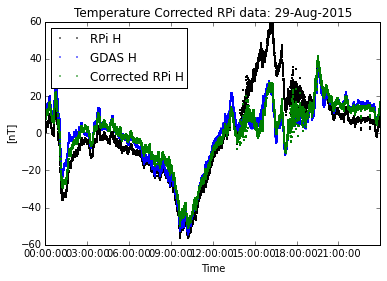

In [27]:
Rpi_H_corrected = Rpi_data_sec_H_zm  + sc_off[0]*(temp_nomean)**2 + sc_off[1]*(temp_nomean) + sc_off[2]

fig = plt.figure(10)
plt.hold(True)
plt.plot(Rpi_data_sec.index, Rpi_data_sec_H_zm, color='black', linestyle='none', marker='.',markersize=2)
plt.plot(GDAS_data.index, GDAS_H_zm, color='blue', linestyle='none', marker='.',markersize=2)

plt.plot(Rpi_data_sec.index, Rpi_H_corrected, color='green', linestyle='none', marker='.',markersize=2)
         
plt.legend(['RPi H', 'GDAS H', 'Corrected RPi H'], loc=2)
plt.xlabel('Time')
plt.ylabel('[nT]')
plt.title('Temperature Corrected RPi data: 29-Aug-2015')


The black dots show the starting Raspberry Pi measurements, the blue line is the data from the GDAS system. The green curve is the Raspberry Pi data with the effects of temperature removed using the inversion code.



## Disucssion & Conclusion

As you can see the green data now align much better than black data with the blue curve, so we have achieved our aim of removing the temperature effects in the data. 

A few things to note are that the temperature correction does have a fairly significant non-linear term (-0.5 nT^2/degree) and a large linear term (-2.15 nT/degree). The offset is arbitrary and will change from day to day. Note that although we have corrected for the temperature changes over the day mathematically, in reality, it is far better not to let the temperature vary. This is because we have still only <i>approximately</i> corrected for the temperature effect, but not exactly. Depending on the application, this correction may well be 'good enough'. However, in general, it is better to control as many factors as you can while you record your data rather than trying to remove them <i>post-hoc</i>.


-----
This sheet has demonstrated how to load in and visualise the two different datasets, how to resample the lower time resolution dataset onto a higher time resolution and then compute the difference between the datasets. Having computed the difference between the GDAS and Raspberry Pi datasets, we compared it to the temperature recorded and assumed that the large scale differences over the day were due to temperature variation. We then solved the least-square inversion to find scaling and offset coefficients that best matched the difference data. We used these coefficients to remove the temperature effect in the Raspberry Pi data. 